3-1 - Identify the Appropriate Hypotheses to Test for a Statistically Significant Association Between Two Quantitative Variables

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

crashes = sns.load_dataset("car_crashes")

mycols = ['total', 'speeding', 'alcohol']

crashes = crashes[mycols]
crashes.head()

,total,speeding,alcohol
0,18.8,7.332,5.640
1,18.1,7.421,4.525
2,18.6,6.510,5.208
3,22.4,4.032,5.824
4,12.0,4.200,3.360


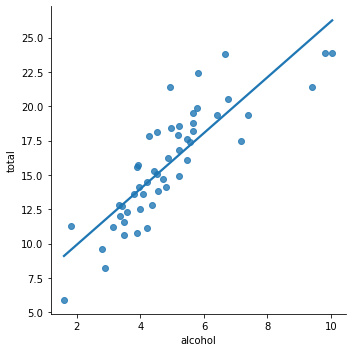

<Figure size 432x288 with 0 Axes>

In [3]:
sns.lmplot(data = crashes, x = 'alcohol', y = 'total', ci = None)
plt.show()
plt.clf()

In [4]:
3-2 - Conduct and Interpret a t-test for the Slope Parameter and Make the Connection Between the t-test for a Population Mean and Slope Coefficient

SyntaxError: invalid syntax (1491962207.py, line 1)

In [ ]:
crashes

,total,speeding,alcohol
0,18.8,7.332,5.640
1,18.1,7.421,4.525
2,18.6,6.510,5.208
3,22.4,4.032,5.824
4,12.0,4.200,3.360
5,13.6,5.032,3.808
6,10.8,4.968,3.888
7,16.2,6.156,4.860
8,5.9,2.006,1.593
9,17.9,3.759,5.191


In [ ]:
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm

Y = crashes['total']
X = crashes['alcohol']

#creating model with x,y data
X = sm.add_constant(X)
model = sm.OLS(Y, X)

#Fit the model
results = model.fit()

#Look at the results that include the t-statistic
print(results.t_test([1, 0]))

                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0             5.8578      0.921      6.357      0.000       4.006       7.709


Yay! We fit our linear model, we have the slope (coef in the table), standard error (std err) and the t-value (t). Remember from the previous sprint how the t-statistics is calculated:

 t = \frac{\bar{x} - \mu_0}{SE} 

where bar{x} is the sample mean, \mu_0 is the mean under the null hypothesis and SE is the standard error. Because we are performing the hypothesis test on the slope parameter, we adjust the t-statistic:

 t = \frac{b_1 - \beta_1}{SE} 

where b_1 is the slope in the sample, \beta_1 is the slope under the null hypothesis and SE is the standard error.

Remember that we stated the null hypothesis as there is no relationship between the variables, so the slope (\beta_1) is equal to zero. Let’s plug in the numbers and compare what we calculate as the t-statistic to the output in the table above.

t = \frac{5.8578 - 0}{0.921} = 6.36

3-4 - Identify Violations of the Assumptions for Linear Regression and Articulate Why Correlation Does Not Imply Causation Inference for Linear Regression

Linear Regression: When not to use it

    with variables that have categorical outcomes (like a classification)
    trying to model non-linear relationships
    with outliers (without adjusting for them)

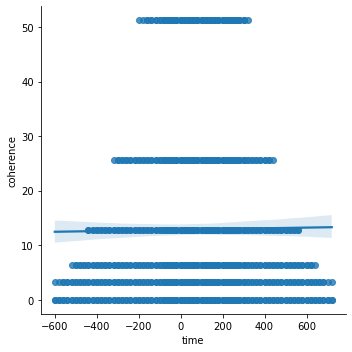

<Figure size 432x288 with 0 Axes>

In [ ]:
#categorial variables

dots = sns.load_dataset("dots")
sns.lmplot(data = dots, x = 'time', y = 'coherence', ci = 95)

plt.show() 
plt.clf()


In [ ]:
#non-linear data (csv not included with bundle)

temps = pd.read_csv('denver_temps.csv')
sns.lmplot(data = temps, x = 'time', y = 'temperature', ci = 95)

FileNotFoundError: [Errno 2] No such file or directory: 'denver_temps.csv'

In [5]:
crashes = sns.load_dataset("car_crashes")
crashes.head()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA


In [8]:
from statsmodels.formula.api import ols
model = ols('total ~ alcohol', data = crashes).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  total   R-squared:                       0.727
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                     130.5
Date:                Wed, 24 Aug 2022   Prob (F-statistic):           2.04e-15
Time:                        19:33:41   Log-Likelihood:                -110.99
No. Observations:                  51   AIC:                             226.0
Df Residuals:                      49   BIC:                             229.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.8578      0.921      6.357      0.0

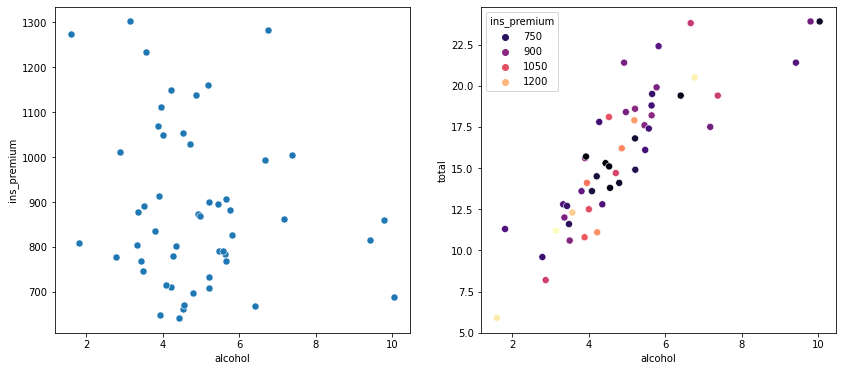

<Figure size 432x288 with 0 Axes>

In [11]:
import matplotlib.pyplot as plt

fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(14,6))

# Compare the two independent variables to each other - are they related?
sns.scatterplot(x='alcohol', y='ins_premium', data=crashes, s=50, ax=ax1)
# The color no represents the percentage of speeding drivers
sns.scatterplot(x='alcohol', y='total', hue='ins_premium', data=crashes, s=50, palette='magma', ax=ax2);

plt.show()
plt.clf()

In [12]:
# Set-up and fit the model in one step
# (format Y ~ X1 + X2)
model = ols('total ~ alcohol + speeding', data=crashes).fit()

# Print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  total   R-squared:                       0.730
Model:                            OLS   Adj. R-squared:                  0.719
Method:                 Least Squares   F-statistic:                     64.87
Date:                Thu, 25 Aug 2022   Prob (F-statistic):           2.27e-14
Time:                        00:03:01   Log-Likelihood:                -110.71
No. Observations:                  51   AIC:                             227.4
Df Residuals:                      48   BIC:                             233.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.6807      0.957      5.934      0.0

In [13]:
model2 = ols('total ~ alcohol', data=crashes).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  total   R-squared:                       0.730
Model:                            OLS   Adj. R-squared:                  0.719
Method:                 Least Squares   F-statistic:                     64.87
Date:                Thu, 25 Aug 2022   Prob (F-statistic):           2.27e-14
Time:                        13:01:14   Log-Likelihood:                -110.71
No. Observations:                  51   AIC:                             227.4
Df Residuals:                      48   BIC:                             233.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.6807      0.957      5.934      0.0

3-1 - Define a Vector and Calculate a Vector Length and Dot Product

In [14]:
import numpy as np

# Two-dimensonal vector
my_2dvector = np.array([7, 9])
print('2D vector:', my_2dvector)

# Three-dimensonal vector
my_3dvector = np.array([4, 7, 2])
print('3D vector:', my_3dvector)

2D vector: [7 9]
3D vector: [4 7 2]


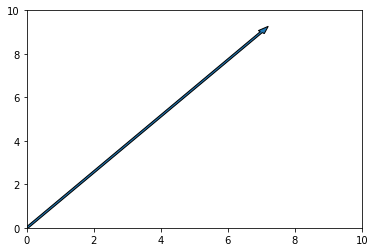

<Figure size 432x288 with 0 Axes>

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(1,1)
ax.arrow(0, 0, 7, 9, width=.075)
ax.set_xlim([0, 10]); ax.set_ylim([0, 10])

plt.show()

plt.clf()

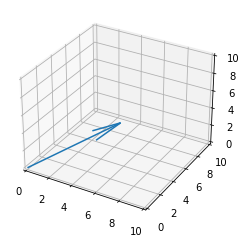

<Figure size 432x288 with 0 Axes>

In [18]:
from mpl_toolkits import mplot3d

# 3D vector
c = [4,7,2]
vector = np.array([[0, 0, 0, c[0], c[1], c[2]]])
# Create variables for plotting
X, Y, Z, U, V, W = zip(*vector)
# Plot!
ax = plt.axes(projection='3d')
ax.quiver(X, Y, Z, U, V, W, length=1)
ax.set_xlim([0, 10]); ax.set_ylim([0, 10]); ax.set_zlim([0, 10])

plt.show()
plt.clf()

In [19]:
# Row vector
my_row_vector = np.array([8,6,7,5,3,0,9])
print('Row vector:', my_row_vector)

# Column vector
# reshape(-1,1): specifies one column, unknown rows 
my_column_vector = np.array([8,6,7,5,3,0,9]).reshape(-1,1)
print('Column vector:\n', my_column_vector)

Row vector: [8 6 7 5 3 0 9]
Column vector:
 [[8]
 [6]
 [7]
 [5]
 [3]
 [0]
 [9]]


Vector Math
Vector length
We can also do math with vectors. As we said earlier, vectors have a magnitude and direction. The magnitude of a vectors is just it’s length. We determine the length by taking the sum of the squares of each element and then take the square root:

Three-dimensional vector: $$\vec{b} = \begin{bmatrix}4 & 7 & 2\end{bmatrix}$$

$$||\vec{b}|| = \sqrt{b_1^2 + b_2^2 + b_3^2} = \sqrt{4^2 + 7^2 + 2^2} = \sqrt{16+49+4} = \sqrt{69} = 8.3$$

Vector dot product
The dot product is a kind of multiplication where we’re applying one vector to another. It can also be thought of as applying the directional growth of one vector to another.

We’ll calculate the dot product for vectors $\vec{b}$ and $\vec{c}$:


$$\vec{b} = \begin{bmatrix}4 & 7 & 2\end{bmatrix}
\qquad
\vec{c} = \begin{bmatrix} 6 & 1 & 7\end{bmatrix}$$

The dot product notation looks like this:

$$\vec{b} \cdot \vec{c}$$

It represents the sum of the element-wise multiplication of the two vectors:

$$\vec{b} \cdot \vec{c} = b_{1}c_{1} + b_{2}c_{2} + b_{3}c_{3}  = (4)(6) + (7)(1) + (2)(7)   = 24 + 7 + 14   = 45$$ 

We can also do vector math in Python. Let’s reproduce the vector length and dot product calculations we just did, only using numpy.

In [20]:
# Vector length
b = np.array([4, 7, 2])
np.linalg.norm(b)

8.306623862918075

In [21]:
# Dot product of two arrays (vectors)
b = np.array([4, 7, 2])
c = np.array([6, 1, 7])
np.dot(b, c)

45

3-2 - Explain Cosine Similarity and Compute the Similarity Between Two Vectors

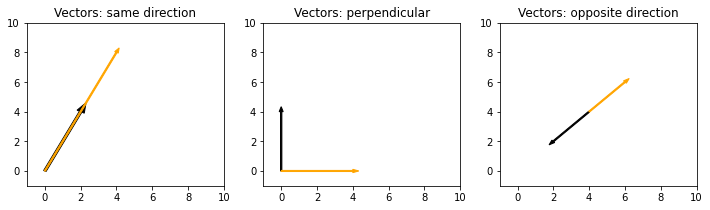

<Figure size 432x288 with 0 Axes>

In [27]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Plot identical and opposite vectors

fig, [ax1, ax2, ax3] = plt.subplots(1,3, figsize=(12,3))

# vector1 = [2, 4]; vector2 = [4, 8]
# Same direction, y is twice as long
ax1.arrow(0, 0, 2, 4, color='k', width=.15)
ax1.arrow(0, 0, 4, 8, color='orange', width=.075)
ax1.set_xlim([-1, 10]); ax1.set_ylim([-1, 10])
ax1.set_title("Vectors: same direction")

# vector1 = [0, 4]; vector2 = [4, 0]
# Right angle vectors
ax2.arrow(0, 0, 0, 4, color='k', width=.075)
ax2.arrow(0, 0, 4, 0, color='orange', width=.075)
ax2.set_xlim([-1, 10]); ax2.set_ylim([-1, 10])
ax2.set_title("Vectors: perpendicular")

# vector1 = [-2, -2]; vector2 = [2, 2]
# Same length, opposite direction
ax3.arrow(4, 4, -2, -2, color='k', width=.075)
ax3.arrow(4, 4, 2, 2, color='orange', width=.075)
ax3.set_xlim([-1, 10]); ax3.set_ylim([-1, 10])
ax3.set_title("Vectors: opposite direction")

plt.savefig('C:/Users/rextr/Desktop/mod4_obj2_vector_angles.png',
           transparent=False, dpi=100)

plt.show()
plt.clf()

On the plot on the left, the vectors point in the same direction. The orange (lighter colored) vector is twice as long as the black vector. The angle between the vectors is 0. On the right, the vectors have the same length but point in the opposite direction. The angle between them is 180 degrees. The middle plot has perpendicular (or orthogonal) vectors to each other, and the angle between them is 90 degrees.

Remember that the cosine is the angle between the hypotenuse and the adjacent side of a triangle.

$$\cos \theta$$

The cosine of the angle is written as the length of the adjacent side over the length of the hypotenuse:

$$\cos \theta = \frac{adjacent}{hypotenuse} $$

Cosine function for different values of $\theta$:

$
\cos 0 = 1 
$

$
\cos 90 = 0 
$

$
\cos 180 = -1
$

Let's plot a pair of vectors where the angle between them is not 0, 90, or 180 degrees:

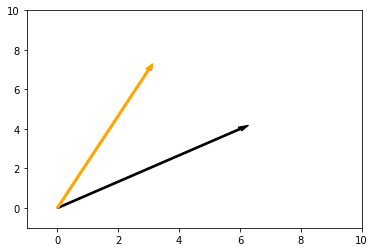

<Figure size 432x288 with 0 Axes>

In [28]:
# Vector plots

x = np.array([6, 4])
y = np.array([3, 7])

fig, ax = plt.subplots(1,1)
ax.arrow(0, 0, x[0], x[1], color='k', width=.075)
ax.arrow(0, 0, y[0], y[1], color='orange', width=.075)
ax.set_xlim([-1, 10]); ax.set_ylim([-1, 10])

# plt.savefig('C:/users/rextr/Desktop/filetestiamgod.png')
plt.show()
plt.clf()

These vectors point in different directions. We can calculate the cosine of the angle between these vectors (or any two vectors) with the following equation:

For vectors $\mathbf {A}$ and $\mathbf {B}$:

$$\mathbf {A} \cdot \mathbf {B} =\left\|\mathbf {A} \right\|\left\|\mathbf {B} \right\|\cos \theta$$

Solving for $\cos\theta$ we get

$$\cos \theta= \frac{\mathbf {A} \cdot \mathbf {B} }{\left\|\mathbf {A} \right\|\left\|\mathbf {B} \right\|}$$

The quantity $\mathbf {A} \cdot \mathbf {B}$ is the dot product and $\left\|\mathbf {A} \right\|\left\|\mathbf {B} \right\|$ is the product of the lengths of the vectors.

Let's use Python to calculate the cosine of the angle between these vectors.

In [40]:
# Calculate cosine theta

# Vectors
x = np.array([6, 4])
y = np.array([3, 7])

# Cosine theta (cosine similarity)
np.dot(x, y) / (np.linalg.norm(x) * np.linalg.norm(y))

0.8376105968386142

3-3 - Define a Matrix and Calculate a Matrix Dot Product, Transpose, and Inverse:

Overview
Now that we've practiced some mathematical operations with vectors, we can continue to expand our linear algebra knowledge and move onto matrices. As with vectors, you've probably also worked with matrices in Python without really focusing on what they were.

Remember the column vector from earlier in the module? We can think of a column vector as a one-dimensional matrix. If we add more columns, then we have additional dimensions and a matrix.

Column vector: $$\vec{a} = \begin{bmatrix}1 \\ 4 \\ 7 \end{bmatrix}$$

Let’s combine some more column vectors (not addition but just adding more columns):

Combining this vector$$\begin{bmatrix}1 \\ 4 \\ 7 \end{bmatrix}$$ and this one $$\begin{bmatrix}2 \\ 5 \\ 8 \end{bmatrix}$$ results in this matrix


$$M = \begin{bmatrix}
1 & 2 \\
4 & 5 \\
7 & 8
\end{bmatrix}$$

Matrices are represented with an upper case letter:


$$M = \begin{bmatrix}
1 & 2 & 3 \\
4 & 5 & 6 \\
7 & 8 & 9
\end{bmatrix}$$

We create matrices in Python using numpy and adding additional column dimensions. Recall that the dimension of a vector is just its length. So we'll have a matrix if we add additional rows to a row vector or additional columns to a column vector. Because we have both a number of rows and a number of columns, we need to talk about the matrix as n rows by m columns; a 2x2 matrix would have two rows and two columns.

Let's create some matrices of different dimensions.



In [30]:
import numpy as np

# Two dimensional numpy array (2x3)
matrix1 = np.array([[ 1, 2, 3],[ 4, 5, 6]])
print('2x3 matrix:\n', matrix1)

# 3x3 numpy array
matrix2 = np.array([[ 1, 2, 3],[ 4, 5, 6], [7, 8, 9]])
print('\n3x3 matrix:\n', matrix2)

2x3 matrix:
 [[1 2 3]
 [4 5 6]]

3x3 matrix:
 [[1 2 3]
 [4 5 6]
 [7 8 9]]


Matrix Math:

We'll go over a few basic matrix operations. Of course, there are many more, but there are several excellent resources available for further review.


Matrix multiplication
We accomplish matrix multiplication by calculating the dot product between the rows of the first matrix and the columns of the second matrix. This image from Math is Fun  (Links to an external site.)is a good illustration.



Let’s multiply two matrices and then check the results with Python.


$$X = 
\begin{bmatrix}
1 & 4 & 8 \\
2 & 3 & 1 \\
\end{bmatrix}$$


$$Y = 
\begin{bmatrix}
1 & 6 \\
2 & 3 \\
5 & 7
\end{bmatrix}$$




$$X Y = 
\begin{bmatrix}
(1)(1)+(4)(2)+(8)(5) & (1)(6)+(4)(3)+(8)(7) \\
(2)(1)+(3)(2)+(1)(5) & (2)(6)+(3)(3)+(1)(7)
\end{bmatrix}$$


$$X Y = \begin{bmatrix}
49 & 74 \\
13 & 28
\end{bmatrix}$$


In [31]:
# Check matrix multiplication with Python

X = np.array([[1,4,8],[2,3,1]])
Y = np.array([[1,6],[2,3],[5,7]])

X_Y = np.matmul(X, Y)
print('X * Y:\n', X_Y)

X * Y:
 [[49 74]
 [13 28]]


In [32]:
A = np.array([[1, 2], [3, 4],[5, 6]])
print('Original matrix:\n', A)

A_T = np.transpose(A)
print('Transposed matrix:\n', A_T)

Original matrix:
 [[1 2]
 [3 4]
 [5 6]]
Transposed matrix:
 [[1 3 5]
 [2 4 6]]


Identity Matrix
The identity matrix is a specific diagonal matrix where there are only ones on the main diagonal and zeros everywhere else. This matrix acts a lot like the number 1: if we multiply any matrix by its identity matrix, the original matrix will remain unchanged. Here's an example of a 3x3 identity matrix.


$I_3 = 
\begin{bmatrix}
1 & 0 & 0 \\
0 & 1 & 0 \\
0 & 0 & 1
\end{bmatrix}$

334 - Use Linear Algebra to Solve for Linear Regression Coefficients
Overview
The material in this sprint has been a combination of exploring linear regression and making inferential statements. And we've also introduced some linear algebra basics. Now we will combine the two and look at how to state a linear regression model with vectors and matrices.

Linear Regression
Recall the form of the linear regression equation (for one independent variable):

$$y = b_0 + b_1x$$

Now we’re going to consider each individual data point we have in our data set - we’ll start with the first, then second, etc.:

$$y_1 = b_0 + b_1x_1$$ 

$$y_2 = b_0 + b_1x_2$$ 

$$y_3 = b_0 + b_1x_3$$

we can generalize by using i for each data point:

$$y_i = b_0 + b_1x_i$$ 

We can start to see some different data structures taking place. Let’s write our target (dependent) variables as a vector and our independent variable also as a vector.


$$\begin{bmatrix} y_1 \\ y_2 \\ y_3 \\ \vdots \\ y_i \end{bmatrix} = 
\begin{bmatrix} b_0 \\ b_0 \\ b_0 \\ \vdots \\ b_0  \end{bmatrix} +
\begin{bmatrix} b_1x_1 \\ b_1x_2 \\ b_1x_3 \\ \vdots \\ b_1x_i  \end{bmatrix}$$


But we can simplify and pull the b coefficients out of the matrix and write them in their own vector:

$$\begin{bmatrix} b_0 \\ b_1 \end{bmatrix}$$ 


The equation now has this form:


$$\begin{bmatrix}y_1 \\ y_2 \\ y_3 \\ \vdots \\ y_i \end{bmatrix} = 
\begin{bmatrix}1 & x_1 \\ 1 & x_2 \\ 1 & x_3 \\ \vdots \\ 1 & x_i  \end{bmatrix}
\begin{bmatrix}b_0 \\ b_1 \end{bmatrix}$$

We can write this in matrix form as:

$$Y = BX$$ 

Solve for the linear regression coefficient
Now, let's put to use what we've learned working with matrices and solve for B. Okay, this involves quite a lot of linear algebra and some calculus. What we want is the least-squares solution to the above equation. Remember the ordinal least-square (OLS) model we used in the previous modules? The least-squares solution is:

$$B = (X^T X)^{-1}X^TY$$ 

where $X^T$ is the transpose of $X$.

Now let’s load in the car crash data set, create the $X$ matrix and $Y$ vector and solve for the coefficients for the linear regression.

In [36]:
import pandas as pd
import seaborn as sns

# Load the car crash dataset
crashes = sns.load_dataset("car_crashes")

crashes.head()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA


In [37]:
# Create independent (feature) matrix
import numpy as np

# Create the ones column
ones = np.repeat(1,len(crashes)).reshape(-1,1)

# Select a column and reshape to add an additional column
alcohol = np.array(crashes['alcohol']).reshape(-1,1)

# "Glue" the columns together
X = np.concatenate((ones, alcohol), axis=1)

# Look at the shape
print('The feature matrix has a shape:', X.shape)

# Create the dependent (target) vector
Y = np.array(crashes['total']).reshape(-1,1)

print('The target vector has a shape:', Y.shape)

The feature matrix has a shape: (51, 2)
The target vector has a shape: (51, 1)


In [38]:
# Calculate X transpose
X_T = np.transpose(X)

# Calculate X transpose multiplied by X
X_T_X = np.matmul(X_T,X)

print('X transpose multiplied by X:\n', X_T_X)

# Calculate the inverse of X_T_X
X_T_X_inv = np.linalg.inv(X_T_X)

print('\nInverse of X transpose multipled by X):\n', X_T_X_inv)

#Calculate X transpose Y
X_T_Y = np.matmul(X_T,Y)

print('\nX transpose multipled by Y:\n', X_T_Y)

# Finally - calculate B =  = (X'X)^-1 multiplied by X'Y

B = np.matmul(X_T_X_inv,X_T_Y)

print('\nThe regression coefficients B are:\n', B)

X transpose multiplied by X:
 [[  51.        249.226   ]
 [ 249.226    1367.408738]]

Inverse of X transpose multipled by X):
 [[ 0.17935002 -0.03268861]
 [-0.03268861  0.00668919]]

X transpose multipled by Y:
 [[ 805.3  ]
 [4239.177]]

The regression coefficients B are:
 [[5.85777615]
 [2.0325063 ]]


# **3:4:1 - Understand and Define Bias**

**Overview**

Machine learning algorithms use mathematical or statistical models with inherent errors in two categories: reducible and irreducible error. Irreducible error, or inherent uncertainty, is due to natural variability within a system. In comparison, reducible error is more controllable and should be minimized to ensure higher accuracy.

Bias and variance are components of reducible error. Reducing errors requires selecting models that have appropriate complexity and flexibility, as well as suitable training data. Data scientists must thoroughly understand the difference between bias and variance to reduce error and build accurate models.

Bias is the calculated error due to systematic mistakes that lead to high or lower results when compared to the actual values. The individual residual of an estimate is the difference between that estimated and the actual value.

In linear regression, prediction bias (Links to an external site.) is “a value indicating how far apart the average of predictions is from the average of labels in the dataset.” In the majority of applications, prediction bias is not deliberately included as part of a model’s design, but it is used as a measure to evaluate and tune the model.

When estimates are biased, they are consistently incorrect in one direction due to mistakes in the model. An example could be a model that consistently predicts daily sales that are higher than those actually observed. The model is biased, as there is a mistake that gives too high an estimate. If this model were to be unbiased, there may still be days predicted that are not correct, but the incorrect sales amounts will sometimes be higher and sometimes lower than the observed sales. 

# **3:4:2 - Understand and Define Variance**

**Overview**

In statistics, variance measures variability (Links to an external site.) from the average or mean. It is calculated by taking the differences between each number in the data set and the mean, then squaring the differences to make them positive, and finally dividing the sum of the squares by the number of values in the data set.

# $ s^2 = {\Sigma(x_i - \bar{x})^2 \over n - 1} $

* A high variance indicates that numbers in the set are far from the mean and far from each other.
* A small variance indicates the opposite.
* A variance value of zero indicates that all values within a set of numbers are identical.
* Every variance that isn’t zero is a positive number.
* A variance cannot be negative. You can’t have a negative value resulting from a square.
 


Higher variance may lead to more errors in values that the model has not seen yet, and fails to generalize well to data it hasn't seen.

# **3:4:3 - Describe the Bias / Variance Tradeoff**

**Overall**

One goal of predictive modeling is to find the optimal "sweet spot" in which we minimize our error.  Ideally, we're trying to find the ideal balance of bias and variance that allows our models to properly generalize to its testing or new values. 

*see "Bias-Variance Tradeoff Visual" and "High Bias vs. High Variance Comparison Visual"*

# **3:4:4 - Define Different Types of Biases**

**Overview**

Bias is the purposeful or unintentional selection of one class or outcome over other groups or outcomes out of a chosen set of data. This occurs when a model or data set is unrepresentative. This drawback in statistical analysis can be rectified in the data selection process as part of your EDA, data cleaning, or feature selection.  

**Types of Bias**

Some types of biases you may encounter include:

***Selection Bias*** 

Using groups, individuals, or data in a way that does not allow for proper randomization. This may result in a sample that is not representative of a population. 
Example: Polling only individuals who have access to a landline telephone in 2012. This demographic may not be wholly representative of all voters in the United States. 


***Survivorship Bias***

Where interpreting the results from individuals who have 'survived' a long process are included or excluded. 
Example: From [Sreenivasan Chandrasekar](https://towardsdatascience.com/what-is-statistical-bias-and-why-is-it-so-important-in-data-science-80e02bf7a88d#f85d):

* “We enroll for gym membership and attend for a few days. We see the same faces of many people who are fit, motivated and exercising everyday whenever we go to gym. After a few days we become depressed why we aren’t able to stick to our schedule and motivation more than a week when most of the people who we saw at gym could. What we didn’t see was that many of the people who had enrolled for gym membership had also stopped turning up for gym just after a week and we didn’t see them.” 
* During World War II, Abraham Wald took survivorship bias into his calculations when considering how to minimize bomber losses to enemy fire

*see "Abraham Wald Survivorship Bias Bomber Hit Data Visual"*

***Recency Bias***

When preference for the most recent event is favored over historic events.

*Example: The final lawyer's closing argument a jury hears before being dismissed to deliberate.* 

There are many others you will have to deal with from your datasets. It is important to use the proper language when describing the results of your models given the sample you have chosen to use from a population. 

